In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from numpy.random import Generator, PCG64
import pandas as pd
from scipy.optimize import curve_fit
rg = Generator(PCG64(12345))

import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
from numpy import *
import statsmodels.api as sm
import matplotlib.pylab as plt
from importlib import reload
import seaborn as sns
from sklearn import linear_model
import scipy
import statsmodels.api as sm

In [3]:
from __future__ import division
import numpy as np
from scipy.special import psi
from statsmodels.sandbox.regression.gmm import GMM

In [4]:
def cir(r0, gamma, rbar, N, alpha1,  n_scenarios):

    dt = 1/252 #time increment
    alpha = gamma*rbar*dt
    sigmadt = (alpha1*dt)**0.5
    beta = 1 - gamma*dt
    epsilon = np.random.normal(0, 1 ,  size=(N, n_scenarios))
    #each column is a scenario, each row is a period
    rates = np.empty_like(epsilon)

    rates[0] = r0
    
    for i in range(1,N):
            rates[i] = alpha+beta*rates[i-1] + rates[i-1]**0.5*sigmadt*epsilon[i]

    return pd.DataFrame(rates,index=np.arange(0,N))
    #return epsilon

In [5]:
def CIR_SimulateExact(r0,A,B,sigma,Deltat,N,NScenarios):
    
 DF = 4*A*B/sigma**2
 C = 2*A/(1-np.exp(-A*Deltat))/sigma**2
 rt = np.zeros((N,NScenarios))
 rt[0,:] = r0
 for i in range(N-1):
     nonc = 2*C*rt[i,:]*np.exp(-A*Deltat)
     rt[i+1,:] = rg.noncentral_chisquare(DF, nonc,size=(1,NScenarios))/(2*C)
 return(pd.DataFrame(rt, index=np.arange(0,N)))

In [6]:
cir_simulation = CIR_SimulateExact(r0=0.5, A=2, B=0.1, sigma=0.2, Deltat=1/252, N=252, NScenarios=1000)

In [7]:
cir_simulation

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
1,0.488801,0.490172,0.499694,0.505012,0.492478,0.485691,0.508698,0.482446,0.484908,0.520210,...,0.514007,0.491541,0.494523,0.480807,0.497301,0.507520,0.493297,0.503306,0.495248,0.488073
2,0.503823,0.493626,0.506981,0.498059,0.482008,0.491912,0.505684,0.457939,0.482820,0.507078,...,0.514606,0.478717,0.504667,0.470690,0.500719,0.513587,0.484558,0.496879,0.496303,0.490708
3,0.497551,0.496057,0.508107,0.499532,0.480633,0.499827,0.508546,0.459856,0.472607,0.494588,...,0.495205,0.468927,0.482772,0.476776,0.498742,0.513205,0.481689,0.496263,0.500442,0.494345
4,0.510534,0.495263,0.511768,0.496976,0.492878,0.490671,0.488085,0.463141,0.478792,0.499954,...,0.509550,0.467367,0.478266,0.466988,0.511745,0.503981,0.467595,0.488782,0.485087,0.490290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0.177556,0.115662,0.156302,0.102656,0.097887,0.135666,0.135976,0.077755,0.114175,0.202984,...,0.105923,0.108939,0.259917,0.095295,0.162819,0.156475,0.151774,0.232212,0.176883,0.099848
248,0.170684,0.115832,0.149907,0.102002,0.101064,0.150141,0.134979,0.079040,0.104082,0.196887,...,0.114793,0.111115,0.259687,0.096686,0.165444,0.151231,0.153367,0.229281,0.180429,0.099027
249,0.168771,0.113172,0.163119,0.106135,0.102441,0.149628,0.141528,0.083343,0.102998,0.183766,...,0.112050,0.113489,0.254462,0.099231,0.164845,0.148835,0.153221,0.237714,0.182464,0.100665
250,0.172195,0.117688,0.161717,0.106278,0.097183,0.157659,0.135182,0.084880,0.097968,0.180500,...,0.110236,0.110532,0.248836,0.092279,0.159410,0.157951,0.159991,0.233717,0.176477,0.100554


In [8]:
def data(cir_simulation):
    N=252
    df = pd.DataFrame()
    y = np.zeros(N)
    x = np.zeros(N)
    for i in range(1,N):
        y[i] = cir_simulation[i]- cir_simulation[i-1]
        df['y'] = y
        x[i] =cir_simulation[i-1]
        df['x'] = x
    
    return df

In [9]:
new = data(cir_simulation[100])

In [10]:
new

,y,x
0,0.000000,0.000000
1,-0.004490,0.500000
2,0.003891,0.495510
3,-0.001900,0.499402
4,0.020084,0.497502
...,...,...
247,0.003024,0.151007
248,-0.000236,0.154032
249,-0.002331,0.153796
250,-0.000805,0.151465


In [11]:
cd = np.array(new['x'])
dcd = np.array(new['y'])
inst = np.column_stack((np.ones(len(cd)), cd))

In [12]:
#dcd = r(t+1) - r(t)
#cd = r(t)

cd = np.array(new['x'])
dcd = np.array(new['y'])
inst = np.column_stack((np.ones(len(cd)), cd))

class gmm(GMM):
    def momcond(self, params):
        p0, p1, p2 = params
        endog = self.endog
        exog = self.exog.squeeze()
        inst = self.instrument   
        dt = 1/252
        error1 = endog - p0 - p1 * exog *dt
        error2 = error1 * exog
        error3 = error1**2 - dt*p2*p2*exog
        #error4 = error3* exog
        g = np.column_stack((error1, error2, error3))
        return g


beta0 = np.array([0.1, 0.1, 0.01])
res = gmm(endog = dcd, exog = cd, instrument = inst, k_moms=3, k_params=3).fit(beta0)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


In [13]:
res.model.exog_names[:] = 'p0 p1 p2'.split()
print(res.summary())

                                 gmm Results                                  
Dep. Variable:                      y   Hansen J:                    8.634e-14
Model:                            gmm   Prob (Hansen J):                   nan
Method:                           GMM                                         
Date:                Wed, 28 Jul 2021                                         
Time:                        10:28:04                                         
No. Observations:                 252                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p0             0.0017      0.001      1.596      0.110      -0.000       0.004
p1            -3.2824      1.244     -2.639      0.008      -5.720      -0.845
p2             0.1977      0.011     18.018      0.000       0.176       0.219


In [14]:
a = -res.params[1]

In [15]:
a

3.282449348869709

In [16]:
dt=1/252

In [17]:
res.params[0]/-res.params[1]/dt

0.13142842240445465

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model # for each observation, fit the maturity curve 

param_fits = zeros((len(cir_simulation.columns),3))
param_names = ['a','b','sigma']
for i in range(0,len(cir_simulation.columns)):
    dt= 1/252
    new = data(cir_simulation[i])
    cd = np.array(new['x'])
    dcd = np.array(new['y'])
    beta0 = np.array([0.1, 0.1, 0.01])
    res = gmm(endog = dcd, exog = cd, instrument = inst, k_moms=3, k_params=3).fit(beta0)
    res.model.exog_names[:] = 'p0 p1 p2'.split()
    param_fits[i,0] = -res.params[1]
    param_fits[i,1] = res.params[0]/param_fits[i,0]/dt
    param_fits[i,2] = res.params[2]
        
# convert into a dataframe for conv. 
param_fits = pd.DataFrame(param_fits,  columns=param_names)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 31
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 27
         Gradi

In [19]:
param_fits

,a,b,sigma
0,2.325972,0.130135,0.213474
1,1.892534,0.055685,0.194263
2,0.687431,-0.159245,0.208788
3,1.707422,0.026121,0.194110
4,2.068894,0.038440,0.214638
...,...,...,...
995,0.913856,-0.073684,0.187750
996,2.873011,0.145949,0.188751
997,1.014340,0.081872,0.191457
998,3.142306,0.158548,0.202616


In [22]:
param_fits.describe()

,a,b,sigma
count,1000.000000,1000.000000,1000.000000
mean,2.496460,0.117174,0.197364
std,1.159534,0.994513,0.009236
min,-0.259628,-7.917248,0.169126
25%,1.701141,0.055904,0.191018
50%,2.336915,0.115739,0.197378
75%,3.205756,0.162968,0.203331
max,8.449552,27.069319,0.226204


In [23]:
from numpy import *
import statsmodels.api as sm
import matplotlib.pylab as plt
from importlib import reload
import seaborn as sns
from sklearn import linear_model
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplotlib.pyplot import cm
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import FormatStrFormatter

import seaborn as sns
sns.set()

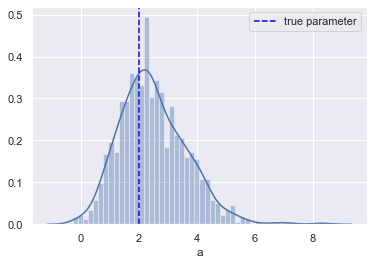

In [24]:
d1 = sns.distplot(param_fits.loc[:,'a'], bins=50)
plt.axvline(2, color='blue', ls='dashed', label = 'true parameter', lw=1.5)
plt.legend()

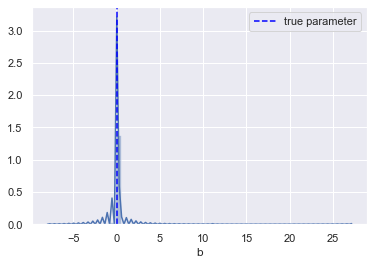

In [25]:
d2 = sns.distplot(param_fits.loc[:,'b'])
plt.axvline(0.1, color='blue', ls='dashed', label = 'true parameter', lw=1.5)
plt.legend()

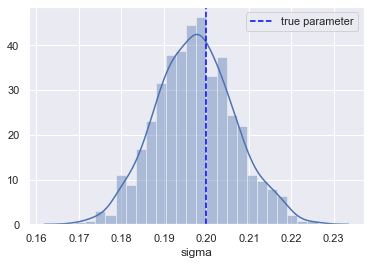

In [27]:
d3 = sns.distplot(param_fits.loc[:,'sigma'])
plt.axvline(0.2, color='blue', ls='dashed', label = 'true parameter', lw=1.5)
plt.legend()
d3